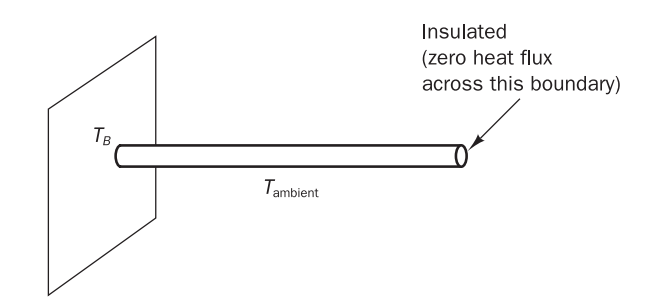

**Problema 4.3)** Considere a barra cilíndrica acima. A temperatura base $T_B = 100 ^\circ C$ e a outra extremidade está isolada, ou seja, não há troca de calor. A barra está exposta a uma temperatura ambiente $T_{\infty} = 20 ^\circ C$.

A equação governante nesse caso será dada por:

\begin{equation}
    \frac{d}{dx} \left( \kappa A \frac{dT}{dx} \right) - hP(T - T_{\infty}) = 0
\end{equation}

Onde $h$ é o coeficiente de convectidade de transferência de calor, ou seja, controla a velocidade de propagação do calor; $\kappa$ é a condutividade térmica do material.

Solução exata:

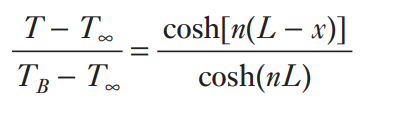

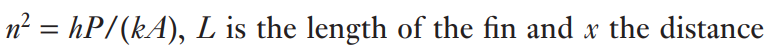

Dados do problema: $L=1$ m, $hP/(\kappa A) = 25/m^2$

A equação contém um termo **SUMIDOURO**: $- hP(T - T_{\infty})$, a perda de condutividade térmica para o ambiente, a qual é função da temperatura.

## Solução 

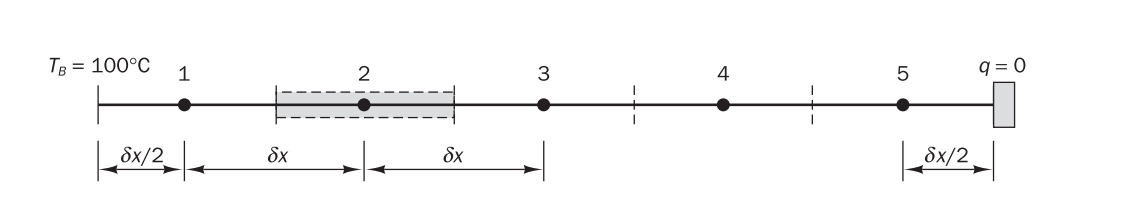

Como $\kappa A$ foi informado que é constante, a EDP pode ser reescrita (APROVEITANDO PARA DIVIDIR TUDO POR $\kappa A$):

\begin{equation}
     \frac{d}{dx} \left(\frac{dT}{dx} \right) - n^2(T - T_{\infty}) = 0
\end{equation}

Integrando no volume...

\begin{equation}
    \int_{\Delta V} \frac{d}{dx} \left(\frac{dT}{dx} \right) dV - \int_{\Delta V} n^2(T - T_{\infty}) dV = 0
\end{equation}

Que pode ser entendida como:

\begin{equation}
    \int_{\Delta A} \int_{x_w}^{x_e} \frac{d}{dx} \left(\frac{dT}{dx} \right) dxdA - \int_{\Delta A} \int_{x_w}^{x_e} n^2(T - T_{\infty}) dx dA = 0
\end{equation}

\begin{equation}
\int_{\Delta A} \left( \frac{dT}{dx} \Biggr|_{x_w}^{} - \frac{dT}{dx} \Biggr|_{x_e}^{} \right) dA - \int_{\Delta A} \int_{x_w}^{x_e} n^2(T - T_{\infty}) dx dA = 0
\end{equation}

\begin{equation}
A \left( \frac{dT}{dx} \Biggr|_{x_e}^{} - \frac{dT}{dx} \Biggr|_{x_w}^{} \right) - \int_{\Delta A} \int_{x_w}^{x_e} n^2(T - T_{\infty}) dx dA = 0
\end{equation}

\begin{equation}
A \left( \frac{T_E- T_P}{\delta x} - \frac{T_P - T_W}{\delta x} \right) - \int_{\Delta A} \int_{x_w}^{x_e} n^2(T - T_{\infty}) dx dA = 0
\end{equation}

O segundo termo é tradado considerando que o mesmo é constante em todo o volume de controle:

\begin{equation}
A \left( \frac{T_E - T_P}{\delta x} - \frac{T_P - T_W}{\delta x} \right) -  n^2(T - T_{\infty}) \delta x A = 0
\end{equation}

Dividindo por A:

\begin{equation}
 \left( \frac{T_E - T_P}{\delta x} - \frac{T_P - T_W}{\delta x} \right) -  n^2(T - T_{\infty}) \delta x = 0
\end{equation}

Isolando tudo conseguimos uma fórmulação geral de conservação com os respectivos coeficientes para os pontos nodais do interior do domínio:

$\left(  \frac{1}{\delta x} + \frac{1}{\delta x} - n^2 \delta x \right)T_P = \frac{1}{\delta x} T_W + \frac{1}{\delta x} T_E + n^2 T_{\infty} \delta x$

Para a condição de contorno situada no ponto 1:

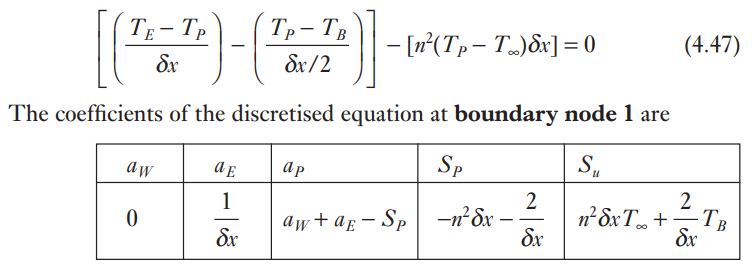

De forma similar no ponto 5:

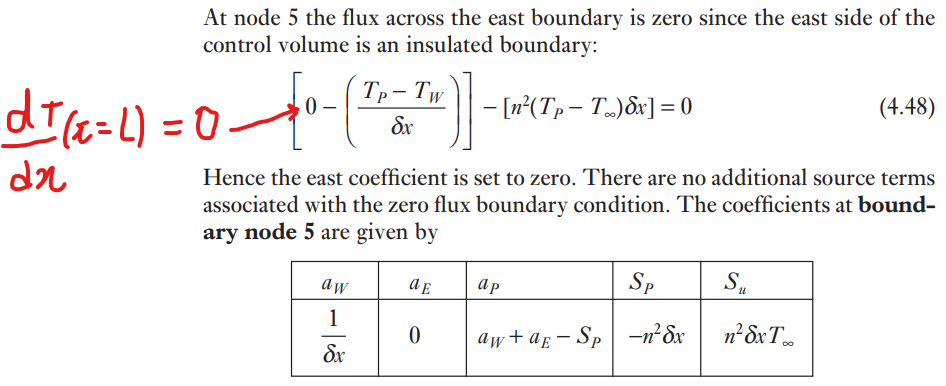
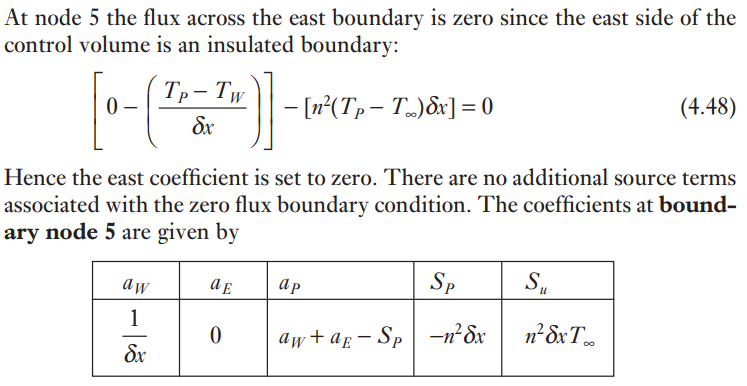

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
N = 100 # Número de pontos
TB = 100 # Temperatura na base
Tinfty = 20 # Temperatura ambiente
L = 1
n = 5 # sqrt(hp/kA)

dx = np.float64(L/N) # delta x

In [3]:
u = np.zeros(N) #armazena solução do passo seguinte
u_old = np.zeros(N) #armazena solução do passo anterior

In [4]:
epsilon = 1e-8 # tolerancia do método de jacobi
error = 1 # erro cometido
iter = 0 # guarda número de iterações

In [5]:
t_start = time.time()
while error > epsilon:
    u[0] = (u_old[1]*(1/dx) + n*n*dx*Tinfty + 2*TB/dx)/(1/dx + n*n*dx + 2/dx)
    u[-1] = (u_old[-2]*(1/dx) + n*n*dx*Tinfty)/(1/dx + n*n*dx)
    for i in range(1,N-1):
        u[i] = (u_old[i-1]*(1/dx) + u_old[i+1]*(1/dx) + n*n*dx*Tinfty)/(1/dx + 1/dx + n*n*dx)
    error = np.linalg.norm(u - u_old, np.inf) # calcula a norma infinito
    iter += 1

    #swap dos u's
    u_aux = u_old
    u_old = u
    u = u_aux    

t_end = time.time()

In [6]:
fvm_solution = np.zeros(N+1)
fvm_solution[0] = TB
fvm_solution[1:] = u_old

In [7]:
x = np.zeros(N+1)
x[0] = 0
x[1:] = np.arange(dx/2, dx/2 + N*dx, dx)

In [8]:
def exact_solution(x):
    return Tinfty + (TB - Tinfty)*np.cosh(n*(L-x))/np.cosh(n*L)

[]

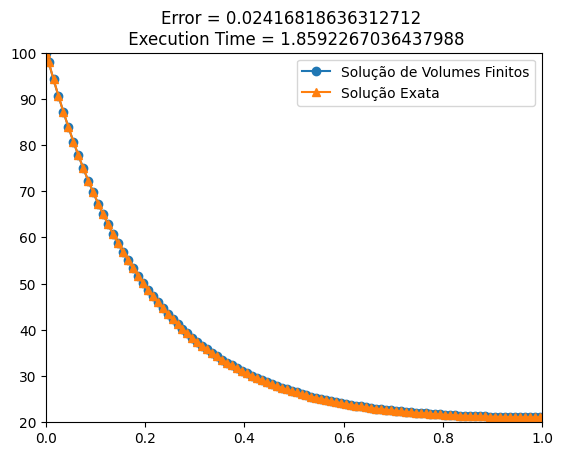

In [11]:
error = np.linalg.norm(fvm_solution - exact_solution(x), np.inf)

plt.plot(x, fvm_solution, label="Solução de Volumes Finitos", marker='o')
plt.plot(x, exact_solution(x), label="Solução Exata", marker='^')
plt.title(f"Error = {error} \n Execution Time = {t_end - t_start}")
plt.xlim(0, L)
plt.ylim(20, 100)
plt.legend()
plt.plot()